In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator






In [ ]:
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
else:
    print("GPU is NOT available.")

GPU is available.


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10
NUM_CLASSES = 2  # Change this based on the number of classes in your dataset

# Load MobileNetV2 pre-trained on ImageNet
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Load VGG16 pre-trained on ImageNet
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in both models
for layer in mobilenet_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers:
    layer.trainable = False

# Combine MobileNetV2 and VGG16 models
input_tensor = Input(shape=(224, 224, 3))
mobilenet_output = mobilenet_model(input_tensor)
vgg16_output = vgg16_model(input_tensor)
combined_output = Concatenate()([mobilenet_output, vgg16_output])

# Add additional layers for classification
x = GlobalAveragePooling2D()(combined_output)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the combined model
combined_model = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
combined_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Display model summary
combined_model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['input_6[0][0]']             
 tional)                                                                                          
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_6[0][0]']             
                                                          8                                       
                                                                                            

In [ ]:
# Use ImageDataGenerator for data augmentation and loading datasets
valid_path = '/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/'
train_path = '/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/train/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# For binary classification, set class_mode='binary'
test_generator = test_datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=16, class_mode='binary')
train_generator = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=16, class_mode='binary')




Found 1012 images belonging to 2 classes.
Found 3196 images belonging to 2 classes.


In [ ]:
# Train the model
history = combined_model.fit(train_generator, epochs=6, validation_data=test_generator)

Epoch 1/6
200/200 [==============================] - 86s 409ms/step - loss: 0.0691 - accuracy: 0.9750 - val_loss: 0.1192 - val_accuracy: 0.9694
Epoch 2/6
200/200 [==============================] - 68s 339ms/step - loss: 0.0380 - accuracy: 0.9869 - val_loss: 0.1128 - val_accuracy: 0.9674
Epoch 3/6
200/200 [==============================] - 67s 335ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.1524 - val_accuracy: 0.9605
Epoch 4/6
200/200 [==============================] - 69s 347ms/step - loss: 0.0206 - accuracy: 0.9928 - val_loss: 0.0977 - val_accuracy: 0.9733
Epoch 5/6
200/200 [==============================] - 72s 360ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.2262 - val_accuracy: 0.9476
Epoch 6/6
200/200 [==============================] - 66s 332ms/step - loss: 0.0096 - accuracy: 0.9953 - val_loss: 0.1691 - val_accuracy: 0.9555


In [ ]:
pred = combined_model.predict(test_generator)
print(pred)

64/64 [==============================] - 9s 125ms/step
[[4.1750912e-04 9.9958247e-01]
 [4.8024545e-13 1.0000000e+00]
 [8.9189926e-11 1.0000000e+00]
 ...
 [1.5088691e-01 8.4911305e-01]
 [7.2748825e-09 1.0000000e+00]
 [9.9958247e-01 4.1748304e-04]]


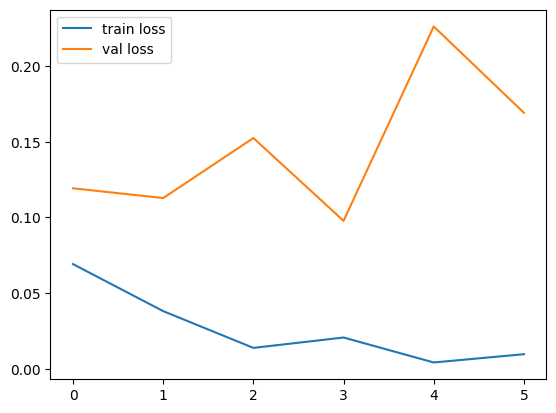

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

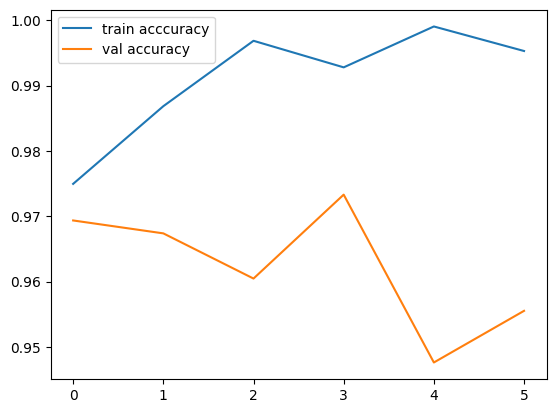

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acccuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

In [ ]:
import os
import shutil
import numpy as np

origin = '/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/'
target1 = '/content/drive/MyDrive/BirdsDrones/TestCheck/birds/'
files = os.listdir(origin)
actual=[]
predicted=[]
values=[]
imageName=[]
ac=[]
pr=[]
for file_name in files:
    print(origin+file_name)
    print(target1+file_name)
    shutil.copy(origin+file_name, target1+file_name)
    imageName.append(str(origin+file_name))
    print(str(origin+file_name))
    #print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BirdsDrones/TestCheck/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')
    images,cls = next(test_set)
    #print("Actual Child")
    pred = combined_model.predict(test_set)

    for my_array in pred:
      values.append(my_array)
      #print(np.argmax(my_array))
      max_index = np.argmax(my_array)
      print("Actual: 0 predicted: " + str(max_index))
      predicted.append(max_index)
      actual.append(0)
    path = r"/content/drive/MyDrive/BirdsDrones/TestCheck/birds/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            #print('Deleting file:', fi)
            os.remove(fi)


/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/ebae105f-5001-48d2-88bd-d698b5cb9fd4.jpg
/content/drive/MyDrive/BirdsDrones/TestCheck/birds/ebae105f-5001-48d2-88bd-d698b5cb9fd4.jpg
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/ebae105f-5001-48d2-88bd-d698b5cb9fd4.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Actual: 0 predicted: 0
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/fe2f4c22-dc13-43b7-af9a-ed2c901f32b6.jpg
/content/drive/MyDrive/BirdsDrones/TestCheck/birds/fe2f4c22-dc13-43b7-af9a-ed2c901f32b6.jpg
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/fe2f4c22-dc13-43b7-af9a-ed2c901f32b6.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 54ms/step
Actual: 0 predicted: 1
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/birds/b2f06b58-6884-4b69-9d58-74c3df7fdd21.jpg
/content/drive/MyDrive/BirdsDrones/TestCheck/birds/b2f06b58-

In [ ]:

origin = '/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/drones/'
target1 = '/content/drive/MyDrive/BirdsDrones/TestCheck/drones/'
files = os.listdir(origin)
for file_name in files:
    #print(origin+file_name)
    #print(target1+file_name)
    shutil.copy(origin+file_name, target1+file_name)
    imageName.append(str(origin+file_name))
    print(str(origin+file_name))
    #print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BirdsDrones/TestCheck/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')
    images,cls = next(test_set)
    #print("Actual Middle")
    pred = combined_model.predict(test_set)

    for my_array in pred:
      values.append(my_array)
      print("Actual: 1 predicted: " + str(max_index))
      #print(np.argmax(my_array))
      max_index = np.argmax(my_array)
      predicted.append(max_index)
      actual.append(1)
    path = r"/content/drive/MyDrive/BirdsDrones/TestCheck/drones/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            print('Deleting file:', fi)
            os.remove(fi)


/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/drones/e49598c5-faf9-480c-8be5-eae268674c33.jpeg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 52ms/step
Actual: 1 predicted: 0
Deleting file: /content/drive/MyDrive/BirdsDrones/TestCheck/drones/e49598c5-faf9-480c-8be5-eae268674c33.jpeg
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/drones/df1df129-e166-405f-9bf8-247257391a16.jpeg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 50ms/step
Actual: 1 predicted: 1
Deleting file: /content/drive/MyDrive/BirdsDrones/TestCheck/drones/df1df129-e166-405f-9bf8-247257391a16.jpeg
/content/drive/MyDrive/BirdsDrones/BirdsDronesDataset/test/drones/ce051209-66b2-473d-8347-222a1dc16c76.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 56ms/step
Actual: 1 predicted: 1
Deleting file: /content/drive/MyDrive/BirdsDrones/TestCheck/drones/ce051209-66b2-473d-8347-222a1dc16c76.jpg
/content/

In [ ]:
# Evaluate the model
test_loss, test_acc = combined_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

64/64 [==============================] - 8s 124ms/step - loss: 0.1691 - accuracy: 0.9555
Test Accuracy: 0.9555336236953735


In [ ]:
combined_model.save("/content/drive/MyDrive/BirdsDrones//Ensembler-BirdsDrones.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
np.save('/content/drive/MyDrive/BirdsDrones/HistoryEnsembler.npy', history.history)

In [ ]:
import numpy as np
import pandas as pd
imageNameData=pd.DataFrame(imageName)
valuesData=pd.DataFrame(values)
predictedData=pd.DataFrame(predicted)
actualData=pd.DataFrame(actual)


In [ ]:
imageNameData.to_csv('/content/drive/MyDrive/BirdsDrones/imageName-Ensembler.csv')
valuesData.to_csv('/content/drive/MyDrive/BirdsDrones/valuesData-Ensembler.csv')
predictedData.to_csv('/content/drive/MyDrive/BirdsDrones/predictedData-Ensembler.csv')
actualData.to_csv('/content/drive/MyDrive/BirdsDrones/actualData-Ensembler.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)

In [ ]:
print(cm)

[[384  42]
 [  3 583]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       426
           1       0.93      0.99      0.96       586

    accuracy                           0.96      1012
   macro avg       0.96      0.95      0.95      1012
weighted avg       0.96      0.96      0.96      1012



Text(0.5, 1.0, 'Refined Confusion Matrix')

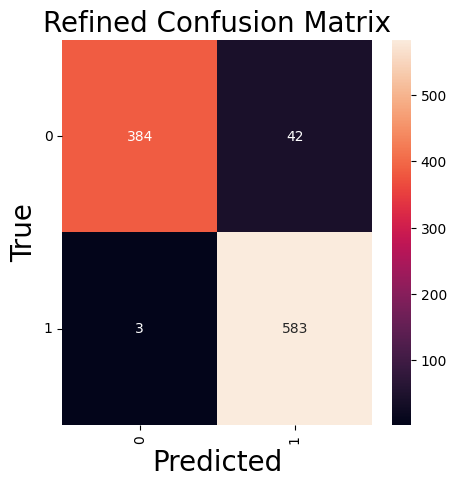

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)

y_pred = np.argmax(predicted, axis=-1)

y_true=np.argmax(actual, axis=-1)

cm = confusion_matrix(actual, predicted)

## Get Class Labels
#labels = le.classes_
class_names = [0,1]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual, predicted)

In [ ]:
mae

0.12745812090313183

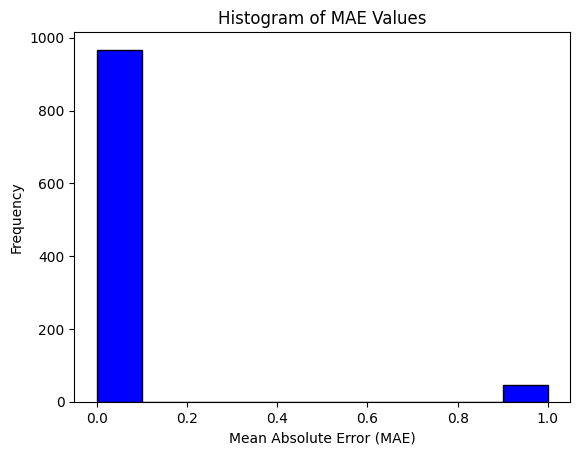

In [ ]:
mae_values = [abs(a - p) for a, p in zip(actual, predicted)]

# Create a histogram
plt.hist(mae_values, bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Frequency')
plt.title('Histogram of MAE Values')

# Show the plot
plt.show()

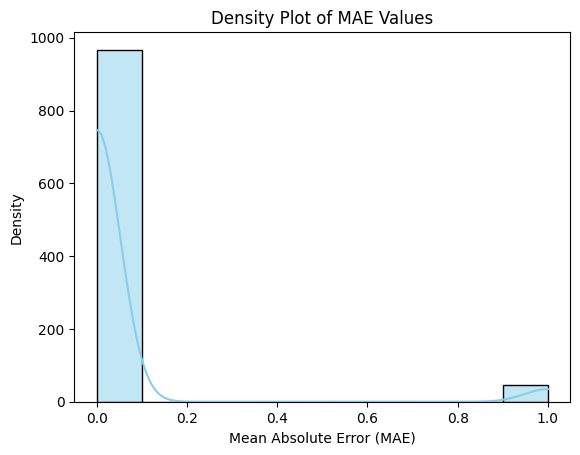

In [ ]:
import seaborn as sns
sns.histplot(mae_values, kde=True, bins=10, color='skyblue')

# Add labels and title
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Density')
plt.title('Density Plot of MAE Values')

# Show the plot
plt.show()

In [ ]:
len(predicted)

1012

In [ ]:
len(actual)

1012

In [ ]:
for i in range(0,2):
  print(i)

0
1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


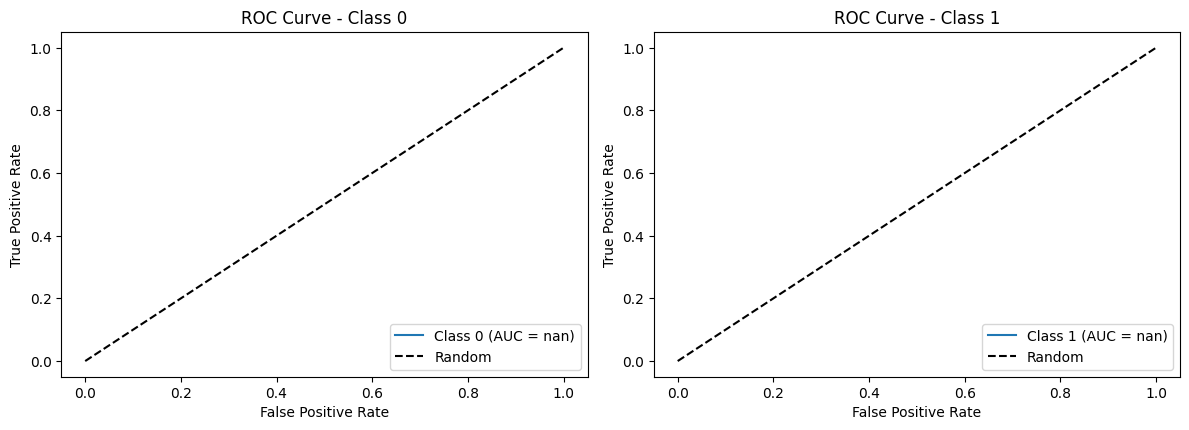

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming 'actual' and 'predicted' are your actual labels and predicted probabilities
# Replace them with your actual data

# Define the ranges for each class
class_ranges = [(0, 425), (426, 1011), (648, 1033), (1034, 1371)]

# Binarize the labels
y_bin = label_binarize(actual, classes=[0, 1, 2, 3])

# Compute and plot ROC curve and AUC for each class
n_classes = y_bin.shape[1]

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    start, end = class_ranges[i]

    # Check if there are positive instances for the current class
    if y_bin[start:end, i].sum() > 0:
        fpr, tpr, _ = roc_curve(y_bin[start:end, i], predicted[start:end])
        roc_auc = auc(fpr, tpr)

        plt.subplot(2, 2, i + 1)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Class {i}')
        plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'actual' and 'predicted' are your actual labels and predicted probabilities
# Replace them with your actual data

# Define the ranges for the first class
class_ranges = [(0, 413), (414, 647), (648, 1033), (1034, 1371)]

# Initialize arrays
a = []
p = []

# Append values for the first class
start, end = class_ranges[0]
a.extend(actual[start:end])
p.extend(predicted[start:end])

# Now 'a' and 'p' contain values for the first class


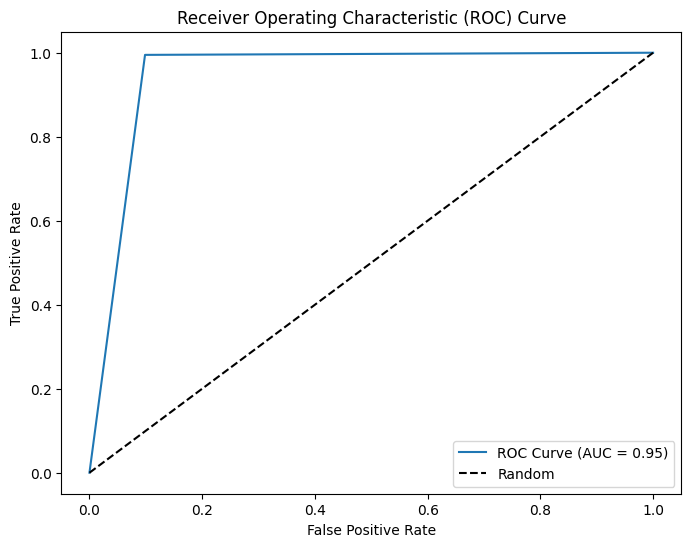

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'a' contains actual labels and 'p' contains predicted probabilities
# Replace them with your actual data

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Check if there are positive instances for the current class
if y_bin[start:end, i].sum() > 0:
    fpr, tpr, _ = roc_curve(y_bin[start:end, i], predicted[start:end])
    roc_auc = auc(fpr, tpr)
print(roc_auc)
    # Rest of the plotting code


0.9481444983896554


# New Section